### BUSINESS UNDERSTANDING AND DATA UNDERSTANDING

##### Business overview

#### The objective was to build a classifier to determine if a customer would ‘soon’ leave SyriaTel, and to determine if there were predictable patterns.

##### 1.What features of the dataset are primary determinants of customer churn and to what extent?
##### 2. What are the ways that these findings can be interpreted and how can SyriaTel implement cost-effective solutions?

##### 3. Will these solutions be feasible in reducing the customer churn rate by at least 7%?

___

#### Data understanding

##### importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_validate,cross_val_predict

from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier



from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,classification_report




In [2]:
#The relative path to our dataset
path="C:\\Users\\HP\\Documents\\PROJECT 3\\bigml_59c28831336c6604c800002a (1).csv"

In [3]:
# Loading the dataset and getting the top 5
data= pd.read_csv(path)
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#information in our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
#The shape of our data frame
data.shape

(3333, 21)

In [6]:
#describing our data
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
#a function to describe our columns
def describe_columns(self):
    print(self.columns)
    print(self.dtypes)
    print(self.shape)
    print(self.info())

    print(self.describe())
    
    
    

In [8]:
describe_columns(data)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night 

### DATA PREPARATION

#### Explanatory Data Analysia

In [9]:
#to find the count of missing and duplicated values
def data_describe(data):
    missing_values = data.isna().sum().sum()
    duplicated_values = data.duplicated().sum()
    print(f"Number of missing values :{missing_values}\nNumber of duplicated:{duplicated_values}")
data_describe(data)  

Number of missing values :0
Number of duplicated:0


* There are no missing values and duplicated values in the dataset.The data set is now clean and ready for analysis

In [10]:
# inspecting the values of the coumn in the dataset
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

* It is interesting to see that there are only 3 area_codes. It might be worth investigating whether a particular area code has higher churn than another or if it would be safe to simply drop area code. Also, area code would actually be more of a categorical feature rather than an int feature so we will change this data type.
* Since churn  (target) is a binary feature, we will replace churn with a label (0 or 1).

* Phone number is customer number feature for the client and has no meningful essence o we can drop the column
* We can see that columns international_plan and voice_mail_plan are binary features with yes/no values - we might want to change these types later to booleans or 1/0's.
* All minutes, calls and charges columns have reasonable values and nothing stands out as unusual at this stage.
* All states look normal, as expected.




In [11]:
#ropping phone number and state columns
data.drop(["phone number","state"],axis=1,inplace=True)

####  Exploring the Target(Churn)

In [12]:
# Finding the values pf churn column
churn_explore = data["churn"].value_counts()
churn_explore

False    2850
True      483
Name: churn, dtype: int64

* True will mean the customer was churned while False will mean the customer was not churned

In [13]:
# lets replace True with 1 and False 0
data.churn.replace((True,False),(1,0),inplace=True)

In [14]:
#converting the international plan and voicemail plan to Binary
data['international plan'] = data['international plan'].map({'yes': 1, 'no': 0})
data['voice mail plan'] = data['voice mail plan'].map({'yes': 1, 'no': 0})

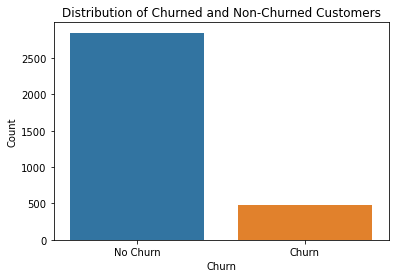

In [15]:

# Create a bar plot of churned vs. non-churned customers
sns.countplot(x="churn", data=data)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks([0, 1], ["No Churn", "Churn"])
plt.title("Distribution of Churned and Non-Churned Customers")
plt.show()

exploring other features with churn

1. Area code

In [16]:
 # grouping area code and churn
grouped_data=data.groupby(["area code","churn"]).mean()


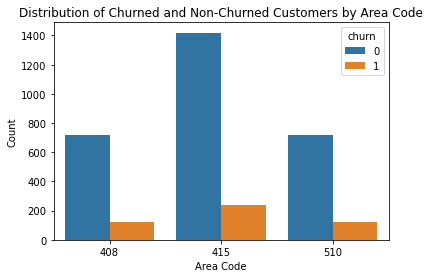

In [17]:
# Create a bar plot of churned vs. non-churned customers, grouped by area code
sns.countplot(x="area code", hue="churn", data=data)

# Add labels and titles to the plot
plt.xlabel("Area Code")
plt.ylabel("Count")
plt.title("Distribution of Churned and Non-Churned Customers by Area Code")

# Show the plot
plt.show()

* the plot suggests that there may be a relationship between customer location and churn rate, with area code 415 having a higher churn rate compared to the other area codes.After further investigation, it is clear that the 415 area code has more customers than the 408 or 510 area codes. However, all three area codes have around the same churn rate. Since there is no clear pattern, I believe it is safe to delete the area code column from the dataset as well.

2.Customer services

In [18]:
cust_serv_calls = (data.groupby(['customer service calls'])['churn'].mean())
cust_serv_calls

customer service calls
0    0.131994
1    0.103302
2    0.114625
3    0.102564
4    0.457831
5    0.606061
6    0.636364
7    0.555556
8    0.500000
9    1.000000
Name: churn, dtype: float64

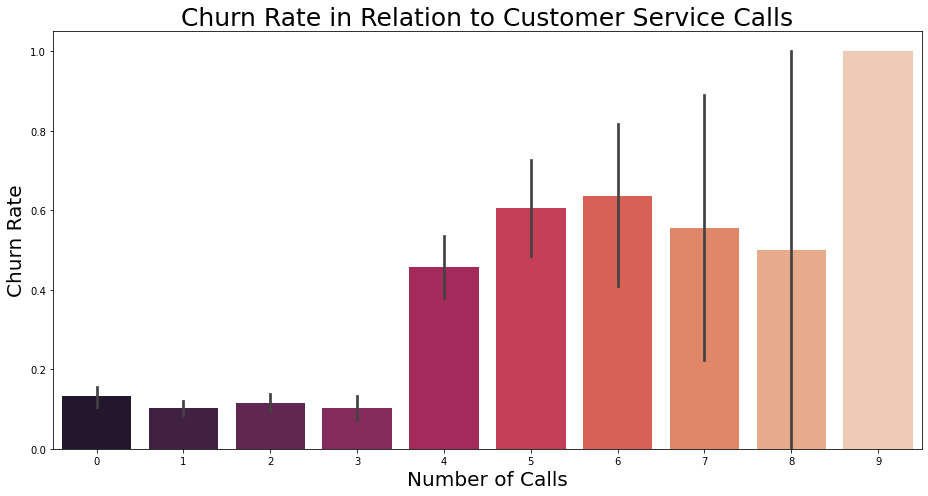

In [19]:
fig, ax = plt.subplots(figsize=(13,7))
sns.barplot(data=data, x=data['customer service calls'], y='churn',palette="rocket", ax = ax)
plt.title('Churn Rate in Relation to Customer Service Calls', fontsize=25)
plt.ylabel('Churn Rate', fontsize=20)
plt.xlabel('Number of Calls', fontsize=20)
plt.tight_layout();

* it appears that there is a strong relationship between the number of times a customer calls customer service and their likelihood to churn. Specifically, the chart shows that when a customer has to call customer service four times, the likelihood of churn significantly increases

* By addressing customer issues in a timely and effective manner, businesses may be able to reduce customer churn and improve overall customer satisfaction.

3. international plan

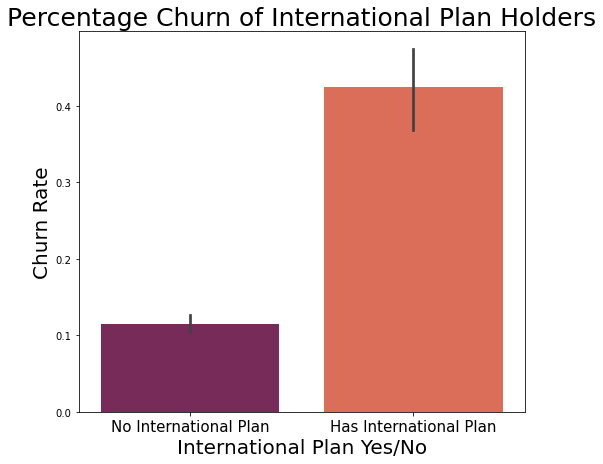

In [20]:
fig, ax = plt.subplots(figsize=(8,7))
sns.barplot(data=data, x=data['international plan'], y='churn', palette="rocket", ax = ax)
plt.title('Percentage Churn of International Plan Holders', fontsize=25)
plt.xlabel('International Plan Yes/No', fontsize=20)
plt.ylabel('Churn Rate', fontsize=20)
ax.set_xticklabels(['No International Plan', 'Has International Plan'], fontsize=15)
plt.tight_layout;

* Obervation:From the graph above majority of the customers holding international plan are churning because the services of SyriaTel are not fully satisfying them.
we therefore recommend SyriaTel to conduct a further research on the causes of the high customer churn to holders of international plan so as to reduce the high rate of churning.

### To check for outliers

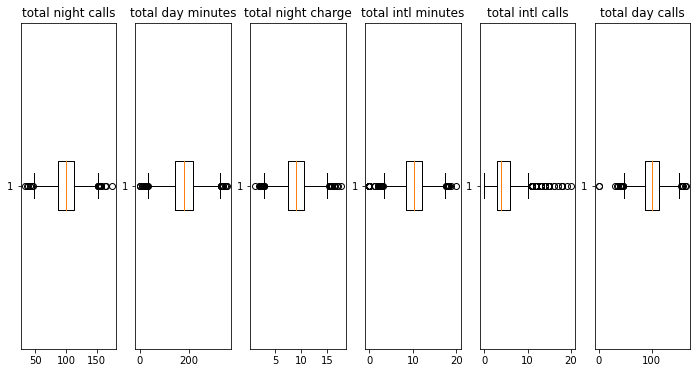

In [21]:

# Select the columns that contain numerical data
num_cols = ["total night calls", "total day minutes", "total night charge","total intl minutes","total intl calls","total day calls"]
# Create a boxplot for each numerical column
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12, 6))
for i, col in enumerate(num_cols):
    axes[i].boxplot(data[col], vert=False)
    axes[i].set_title(col)

plt.show()

*  looking at outliers this indicate that some customers have significantly higher charges compared to the majority of customers. This could be due to factors such as premium services, overage charges, or other factors that increase the customer's bill.

In [22]:
#finding the correlation between churn and other features
data.corr().churn.sort_values(ascending=True)

voice mail plan          -0.102148
number vmail messages    -0.089728
total intl calls         -0.052844
total night calls         0.006141
area code                 0.006174
total eve calls           0.009233
account length            0.016541
total day calls           0.018459
total night minutes       0.035493
total night charge        0.035496
total intl minutes        0.068239
total intl charge         0.068259
total eve charge          0.092786
total eve minutes         0.092796
total day charge          0.205151
total day minutes         0.205151
customer service calls    0.208750
international plan        0.259852
churn                     1.000000
Name: churn, dtype: float64

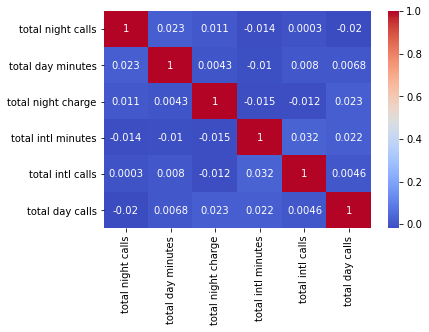

In [23]:
# a plot showing the correlation matrix for numerical columns
corr_matrix = data[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

plt.show()

In [24]:
#plot correlation heatmap
data_correlation = data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
# convert all features that have a correlation to price of more than 0.3
data_correlation

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.00,-0.01,0.02,0.00,-0.00,0.01,0.04,0.01,-0.01,0.02,-0.01,-0.01,-0.01,-0.01,0.01,0.02,0.01,-0.00,0.02
area code,-0.01,1.00,0.05,-0.00,-0.00,-0.01,-0.01,-0.01,0.00,-0.01,0.00,-0.01,0.02,-0.01,-0.02,-0.02,-0.02,0.03,0.01
international plan,0.02,0.05,1.00,0.01,0.01,0.05,0.00,0.05,0.02,0.01,0.02,-0.03,0.01,-0.03,0.05,0.02,0.05,-0.02,0.26
voice mail plan,0.00,-0.00,0.01,1.00,0.96,-0.00,-0.01,-0.00,0.02,-0.01,0.02,0.01,0.02,0.01,-0.00,0.01,-0.00,-0.02,-0.10
number vmail messages,-0.00,-0.00,0.01,0.96,1.00,0.00,-0.01,0.00,0.02,-0.01,0.02,0.01,0.01,0.01,0.00,0.01,0.00,-0.01,-0.09
total day minutes,0.01,-0.01,0.05,-0.00,0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01,0.21
total day calls,0.04,-0.01,0.00,-0.01,-0.01,0.01,1.00,0.01,-0.02,0.01,-0.02,0.02,-0.02,0.02,0.02,0.00,0.02,-0.02,0.02
total day charge,0.01,-0.01,0.05,-0.00,0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01,0.21
total eve minutes,-0.01,0.00,0.02,0.02,0.02,0.01,-0.02,0.01,1.00,-0.01,1.00,-0.01,0.01,-0.01,-0.01,0.00,-0.01,-0.01,0.09
total eve calls,0.02,-0.01,0.01,-0.01,-0.01,0.02,0.01,0.02,-0.01,1.00,-0.01,-0.00,0.01,-0.00,0.01,0.02,0.01,0.00,0.01


* You can see here that all *_minutes and *_charge features are perfectly correlated (r = 1). This is to be expected since charge is usually based on minutes. For this reason, we may not need to include both the charge and minutes columns, but rather choose just one. We might also choose to aggregate all the day/eve/night columns into one 'total' column. As mentioned earlier, for a first simple model, we will leave the features as is, but for later iterations we might choose to aggregate and drop these.

 

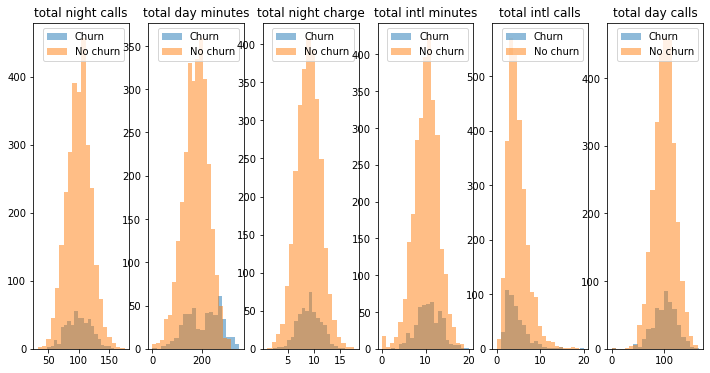

In [25]:
# Create a histogram for each numerical column, grouped by the churn status
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12, 6))
for i, col in enumerate(num_cols):
    data_churn = data[data["churn"] == 1][col]
    data_no_churn = data[data["churn"] == 0][col]
    axes[i].hist(data_churn, alpha=0.5, label="Churn", bins=20)
    axes[i].hist(data_no_churn, alpha=0.5, label="No churn", bins=20)
    axes[i].set_title(col)
    axes[i].legend()

plt.show()

* The histograms suggest that the "total day minutes", "total night charge", "total intl minutes", and "total intl calls" features may be strong predictors of churn, as there is a clear difference in their distributions between churned and non-churned customers. The "total night calls" and "total day calls" features may also be somewhat predictive of churn, although the differences in their distributions between the two groups are less pronounced.

####histogram for categorical

### MODELING

* Baseline model

In [26]:

X=data.drop(["churn"],axis=1)
y=data["churn"]

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:

scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [29]:
# Logistic Regression
base_model = LogisticRegression(random_state=42)

#fitting the model
base_model.fit(X_train_scaled, y_train)

 # Predict Test Set
y_base_pred_test= base_model.predict(X_test_scaled)
y_base_pred_train= base_model.predict(X_train_scaled)





In [30]:
#calculate logistic regression score
lr_score = base_model.score(X_test_scaled, y_test)
lr_score



0.8575712143928036

In [31]:
#cross validation of the logistic regression model
base_cv = cross_val_score(base_model, X_train_scaled, y_train)
base_cv





array([0.85580524, 0.86866792, 0.87054409, 0.84803002, 0.8630394 ])

In [33]:
#classification report on the testing data
base_report = classification_report(y_test, y_base_pred_test)
print(base_report)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.60      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667



* Observing our Dataset it will be of much importance and advisable to over look the Recall scores.A higher Recall will be of benefit to SyriaTel company as it will be able to classify the false positive(incorrectly identifying a customer as likely to leave ) may be less costly as a business can take steps to retain the customer.Recall will therefore be an evaluation metric for this project

The model has an accuracy of 86% on the test data,with a lower recall of 18% and therefore cannot be relied on prediction of the unseen data.

In [35]:
#checking for imbalance 
if (len(y_train) / len(y_test) > 2 or len(y_test) / len(y_train) > 2):
    print("Imbalanced Data")
    print("Train Data : ", len(y_train))
    print("Test Data : ", len(y_test))
    
    

Imbalanced Data
Train Data :  2666
Test Data :  667


There seems to be an imbalance in the dataset and we may consider using SMOTE to balance the dataset on the other models

In [50]:
#from imblearn.over_sampling import SMOTE

# X_train contains the input features and y_train contains the target variable

# Create the SMOTE object
smote = SMOTE()

# Resample the training data using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

* Model 2.Decision tree

In [51]:
Decision_tree = DecisionTreeClassifier(max_depth=5,min_samples_leaf=2,min_samples_split=5,random_state=42)
Decision_tree.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [52]:
#cross validation of Decision tree

Decision_tree_cv= cross_val_score(Decision_tree, X_train_resampled, y_train_resampled)
Decision_tree_cv

array([0.83041575, 0.79102845, 0.77242888, 0.81927711, 0.78203724])

In [58]:
# Predicting the Test on the decision tree
y_pred = Decision_tree.predict(X_test_scaled)
# Printing the confusion matrix
print(confusion_matrix(y_test, y_pred))
# Printing the classification report
print(classification_report(y_test, y_pred))


[[528  38]
 [ 75  26]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       566
           1       0.41      0.26      0.32       101

    accuracy                           0.83       667
   macro avg       0.64      0.60      0.61       667
weighted avg       0.80      0.83      0.81       667



c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


The model has an 83% accuracy lower than the baseline with a recall of 26% which is much better  perfoming than our baseline model

model 3. KKN

In [39]:
#initiating a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
#fitting the classifier to the training data
knn.fit(X_train, y_train)
#predicting the labels of the test data
y_pred = knn.predict(X_test)
#printing the confusion matrix
print(confusion_matrix(y_test, y_pred))
#printing the classification report
print(classification_report(y_test, y_pred))


[[549  17]
 [ 77  24]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       566
           1       0.59      0.24      0.34       101

    accuracy                           0.86       667
   macro avg       0.73      0.60      0.63       667
weighted avg       0.83      0.86      0.83       667



The model has a precision of 59% an accuracy  of 86% and a recall of 24% which is not a good one

model 4. Random forest

In [59]:
#initiating a random forest classifier

clf = RandomForestClassifier(n_estimators=10, random_state=42,max_depth=5)
#fitting the classifier
clf.fit(X_train_resampled, y_train_resampled)
#predicting the outcome
y_pred = clf.predict(X_test_scaled)
#calculating the accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)
#calculating the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
#calculating the classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)
#calculating the precision
precision = metrics.precision_score(y_test, y_pred)
print(precision)
#calculating the recall
recall = metrics.recall_score(y_test, y_pred)
print(recall)
#calculating the f1 score
f1 = metrics.f1_score(y_test, y_pred)
print(f1)



0.8500749625187406
[[566   0]
 [100   1]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       566
           1       1.00      0.01      0.02       101

    accuracy                           0.85       667
   macro avg       0.92      0.50      0.47       667
weighted avg       0.87      0.85      0.78       667

1.0
0.009900990099009901
0.0196078431372549


c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


* The model has a an accuracy of 85% performing better than decision tree with a very low Recall of 10%

#### comparing hyper parameters tuning with GridSearch CV for both Desicion Tree and RandomForest

In [64]:

# Define the hyperparameter grids for the decision tree and random forest models
dt_param_grid = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}

# Create the GridSearchCV objects for the decision tree and random forest models
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5)
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)

# Fit the GridSearchCV objects to the training data
dt_grid_search.fit(X_train, y_train)
rf_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best scores for the models
dt_best_params = dt_grid_search.best_params_
dt_best_score = dt_grid_search.best_score_
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

# Train the decision tree and random forest models with the best hyperparameters on the entire training dataset
dt_clf = DecisionTreeClassifier(**dt_best_params)
rf_clf = RandomForestClassifier(**rf_best_params)
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Make predictions on the test data and evaluate the performance of the models using accuracy
dt_y_pred = dt_clf.predict(X_test)
rf_y_pred = rf_clf.predict(X_test)
dt_recall = recall_score(y_test, dt_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)

# Compare the performance of the decision tree and random forest models based on recall and select the best one
if dt_recall > rf_recall:
    print('Decision tree is better, with recall:', dt_recall)
else:
    print('Random forest is better, with recall:', rf_recall)

Random forest is better, with accuracy: 0.7128712871287128


* Having to tune our RandomForest improves the Recall of our model to 71% .it means that the model correctly identified 71% of the churn test dataset.  The model is good at identifying positive cases which is now better in prediction of our unseen data due to generalization

### Conclusion

* Logistic Regression
Recall score(test) = 18%

* Decision Tree
Recall score(test) = 26%

* Random Forest
Recall score (test)= 10%
* Random Forest with Gridsearch CV
Recall score (test)=71.2%



### RECOMENDATION

* Further investigation should be devoted to looking into the other characteristics of these customers to find out why there was a need to make this many calls to customer service and how the company could better assist these customers.
* Given that over 42% of international plan holders churn, further investigation into retention efforts for these customers might be a worthwhile effort.

* SyriaTel should target on addressing customer issues in a timely and effective manner, as many calls made to them through the customer service led to them churning so as  to reduce customer churn and improve overall customer satisfaction.
